In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os

%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
ACTIVITIES = {
    1: 'SITTING',
    2: 'TALKING STANDING',
    3: 'WALKING',
    4: 'WALKING DOWNSTAIRS',
    5: 'WALKING UPSTAIRS',
}

In [ ]:
df = pd.read_csv('all.csv')
df

,Unnamed: 0.1,Unnamed: 0,AccX[m/s^2],AccY[m/s^2],AccZ[m/s^2],label,obs,t_sec,Vx,Vy,Vz
0,0,0,"9,074509","-1,9462891","-0,36802673",1,1,0,0,0,0
1,1,1,"8,911713","-2,2671204","-0,11663818",1,1,"0,02","0,17823426","-0,045342408","-0,0023327636"
2,2,2,"8,972763","-2,4538574","-0,21958923",1,1,"0,04","0,35768952","-0,094419556","-0,0067245482"
3,3,3,"8,930862","-2,3868256","-0,2962036",1,1,"0,06","0,53630676","-0,142156068","-0,0126486202"
4,4,4,"8,769257","-2,3940125","-0,30697632",1,1,"0,08","0,7116919","-0,190036318","-0,0187881466"
...,...,...,...,...,...,...,...,...,...,...,...
695045,48025,2217,"8,405334","-0,41160583","5,959854",5,15,"44,34","375,709545866","-18,1592733478119","-147,29414843054"
695046,48026,2218,"8,64595","-0,26437378","5,008148",5,15,"44,36","375,882464866","-18,1645608234119","-147,19398547054"
695047,48027,2219,"9,268448","-0,37330627","4,5221252",5,15,"44,38","376,067833826","-18,1720269488119","-147,10354296654"
695048,48028,2220,"8,791992","-0,51815796","3,17659",5,15,"44,4","376,243673666","-18,1823901080119","-147,04001116654"


In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.rename(columns={'Unnamed: 0':'t','obs':'subject','AccX[m/s^2]':'AccX','AccY[m/s^2]':'AccY','AccZ[m/s^2]':'AccZ'}, inplace=True)
df

,t,AccX,AccY,AccZ,label,subject,t_sec,Vx,Vy,Vz
0,0,"9,074509","-1,9462891","-0,36802673",1,1,0,0,0,0
1,1,"8,911713","-2,2671204","-0,11663818",1,1,"0,02","0,17823426","-0,045342408","-0,0023327636"
2,2,"8,972763","-2,4538574","-0,21958923",1,1,"0,04","0,35768952","-0,094419556","-0,0067245482"
3,3,"8,930862","-2,3868256","-0,2962036",1,1,"0,06","0,53630676","-0,142156068","-0,0126486202"
4,4,"8,769257","-2,3940125","-0,30697632",1,1,"0,08","0,7116919","-0,190036318","-0,0187881466"
...,...,...,...,...,...,...,...,...,...,...
695045,2217,"8,405334","-0,41160583","5,959854",5,15,"44,34","375,709545866","-18,1592733478119","-147,29414843054"
695046,2218,"8,64595","-0,26437378","5,008148",5,15,"44,36","375,882464866","-18,1645608234119","-147,19398547054"
695047,2219,"9,268448","-0,37330627","4,5221252",5,15,"44,38","376,067833826","-18,1720269488119","-147,10354296654"
695048,2220,"8,791992","-0,51815796","3,17659",5,15,"44,4","376,243673666","-18,1823901080119","-147,04001116654"


In [ ]:
activity_name = df['label'].map({1: 'SITTING', 2:'TALKING STANDING',3:'WALKING',\
                       4:'WALKING DOWNSTAIRS', 5:'WALKING UPSTAIRS'})
df['ActivityName'] = activity_name

df

,t,AccX,AccY,AccZ,label,subject,t_sec,Vx,Vy,Vz,ActivityName
0,0,"9,074509","-1,9462891","-0,36802673",1,1,0,0,0,0,SITTING
1,1,"8,911713","-2,2671204","-0,11663818",1,1,"0,02","0,17823426","-0,045342408","-0,0023327636",SITTING
2,2,"8,972763","-2,4538574","-0,21958923",1,1,"0,04","0,35768952","-0,094419556","-0,0067245482",SITTING
3,3,"8,930862","-2,3868256","-0,2962036",1,1,"0,06","0,53630676","-0,142156068","-0,0126486202",SITTING
4,4,"8,769257","-2,3940125","-0,30697632",1,1,"0,08","0,7116919","-0,190036318","-0,0187881466",SITTING
...,...,...,...,...,...,...,...,...,...,...,...
695045,2217,"8,405334","-0,41160583","5,959854",5,15,"44,34","375,709545866","-18,1592733478119","-147,29414843054",WALKING UPSTAIRS
695046,2218,"8,64595","-0,26437378","5,008148",5,15,"44,36","375,882464866","-18,1645608234119","-147,19398547054",WALKING UPSTAIRS
695047,2219,"9,268448","-0,37330627","4,5221252",5,15,"44,38","376,067833826","-18,1720269488119","-147,10354296654",WALKING UPSTAIRS
695048,2220,"8,791992","-0,51815796","3,17659",5,15,"44,4","376,243673666","-18,1823901080119","-147,04001116654",WALKING UPSTAIRS


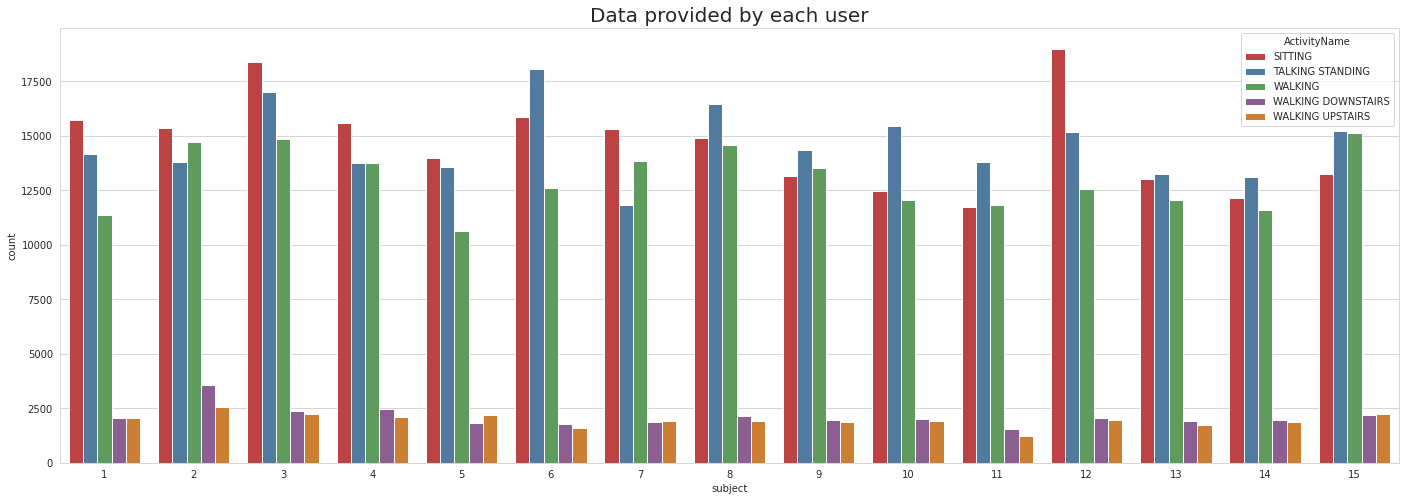

In [ ]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(24,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = df)
plt.show()

Распределение активностей по количеству измерений. Более менее количества измерений по активностям по испытуемым распределены равномерно.

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = df['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()

walking downstairs и walking upstairs наиболее короткие по времени измерения. sitting и talking standing - наиболее длинные.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

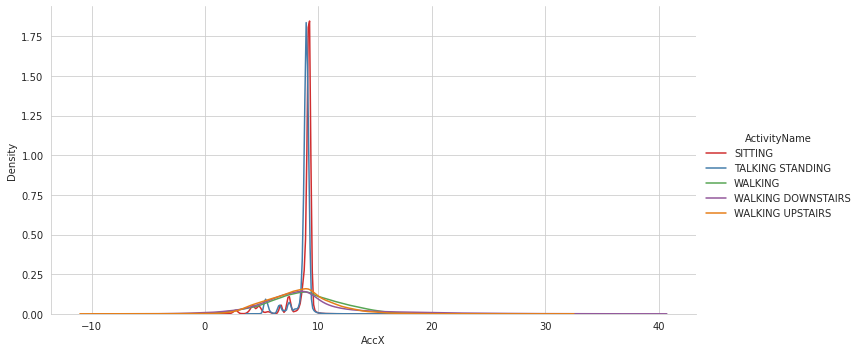

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'AccX', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

График плотности распределения функции AccX.
Видно что статические активности sitting и talking standing распределены одинаково. И динамические walking, walking upstairs, walking downstairs тоже одиноково между собой. Можно сказать, разделились на 2 группы по тому как распределена величина AccX.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

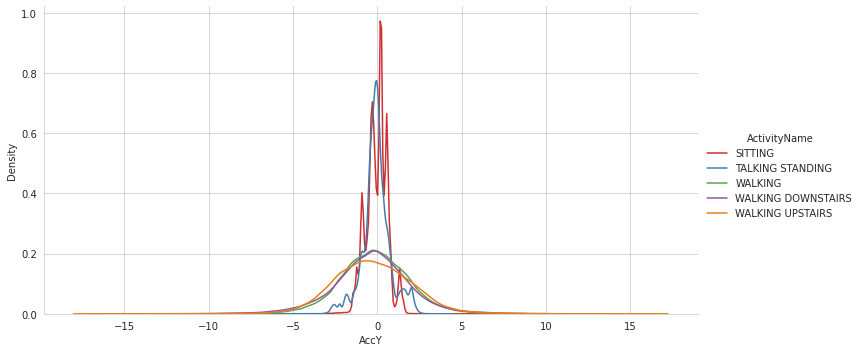

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'AccY', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Теперь посмотрим как рапределена величина AccY. Видно, что снова можно разделить виды активностей на два типа - статические и динамические.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

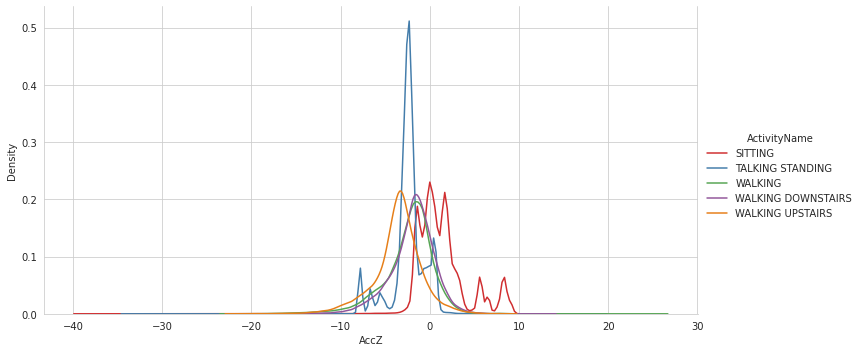

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'AccZ', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Анализируя распределение величины AccZ можно заметить несколько другую картину. Из всех активностей выбивается talking standing. Все остальные распределены более похожим образом. Из них выделяется активность sitting, все остальные имеют колоколообразное распределение, у sitting более "рваное", в чем и наблюдается сходство с распредеением talking standing.


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3

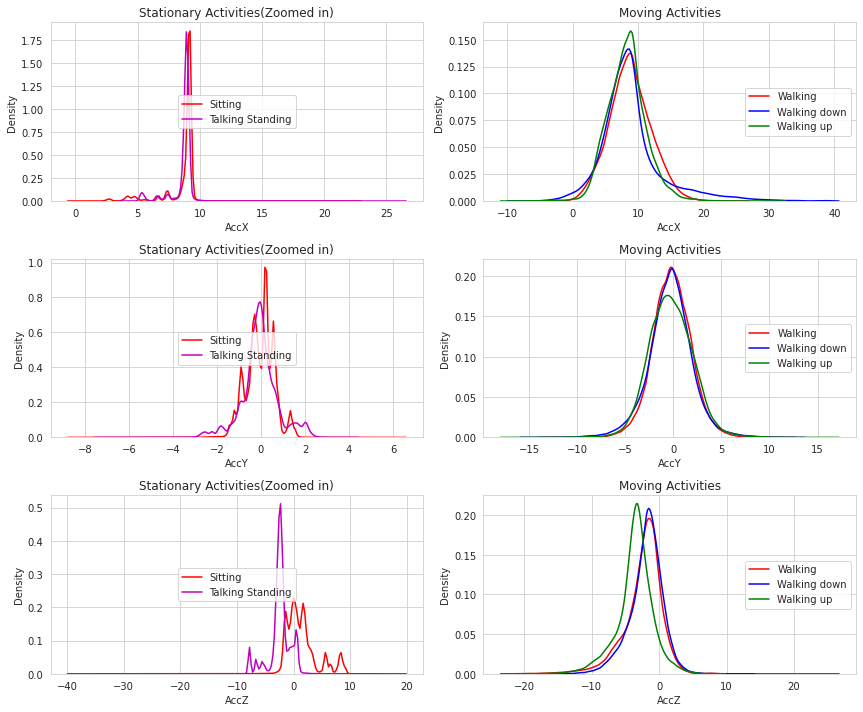

In [ ]:
df1 = df[df['label']==1]
df2 = df[df['label']==2]
df3 = df[df['label']==3]
df4 = df[df['label']==4]
df5 = df[df['label']==5]

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df1['AccX'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df2['AccX'],color = 'm',hist = False,label = 'Talking Standing')
#plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(3,2,2)
plt.title('Moving Activities')
sns.distplot(df3['AccX'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df4['AccX'],color = 'blue',hist = False,label = 'Walking down')
sns.distplot(df5['AccX'],color = 'green',hist = False, label = 'Walking up')
plt.legend(loc='center right')

plt.subplot(3,2,3)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df1['AccY'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df2['AccY'],color = 'm',hist = False,label = 'Talking Standing')
plt.legend(loc='center')

plt.subplot(3,2,4)
plt.title('Moving Activities')
sns.distplot(df3['AccY'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df4['AccY'],color = 'blue',hist = False,label = 'Walking down')
sns.distplot(df5['AccY'],color = 'green',hist = False, label = 'Walking up')
plt.legend(loc='center right')

plt.subplot(3,2,5)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df1['AccZ'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df2['AccZ'],color = 'm',hist = False,label = 'Talking Standing')
plt.legend(loc='center')

plt.subplot(3,2,6)
plt.title('Moving Activities')
sns.distplot(df3['AccZ'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df4['AccZ'],color = 'blue',hist = False,label = 'Walking down')
sns.distplot(df5['AccZ'],color = 'green',hist = False, label = 'Walking up')
plt.legend(loc='center right')



plt.tight_layout()
plt.show()

разделим на две группы виды активности и построим все те же распределения по группам, для того чтобы более наглядно увидеть их сходства и отличия.

In [ ]:
print('No of duplicates: {}'.format(sum(df.duplicated())))

No of duplicates: 0


Посмотрим графики зависимости значений акселерометра по осям X, Y, Z от времени по каждому испытуемому, чтобы посмотреть насколько данные рознятся от человека к человеку

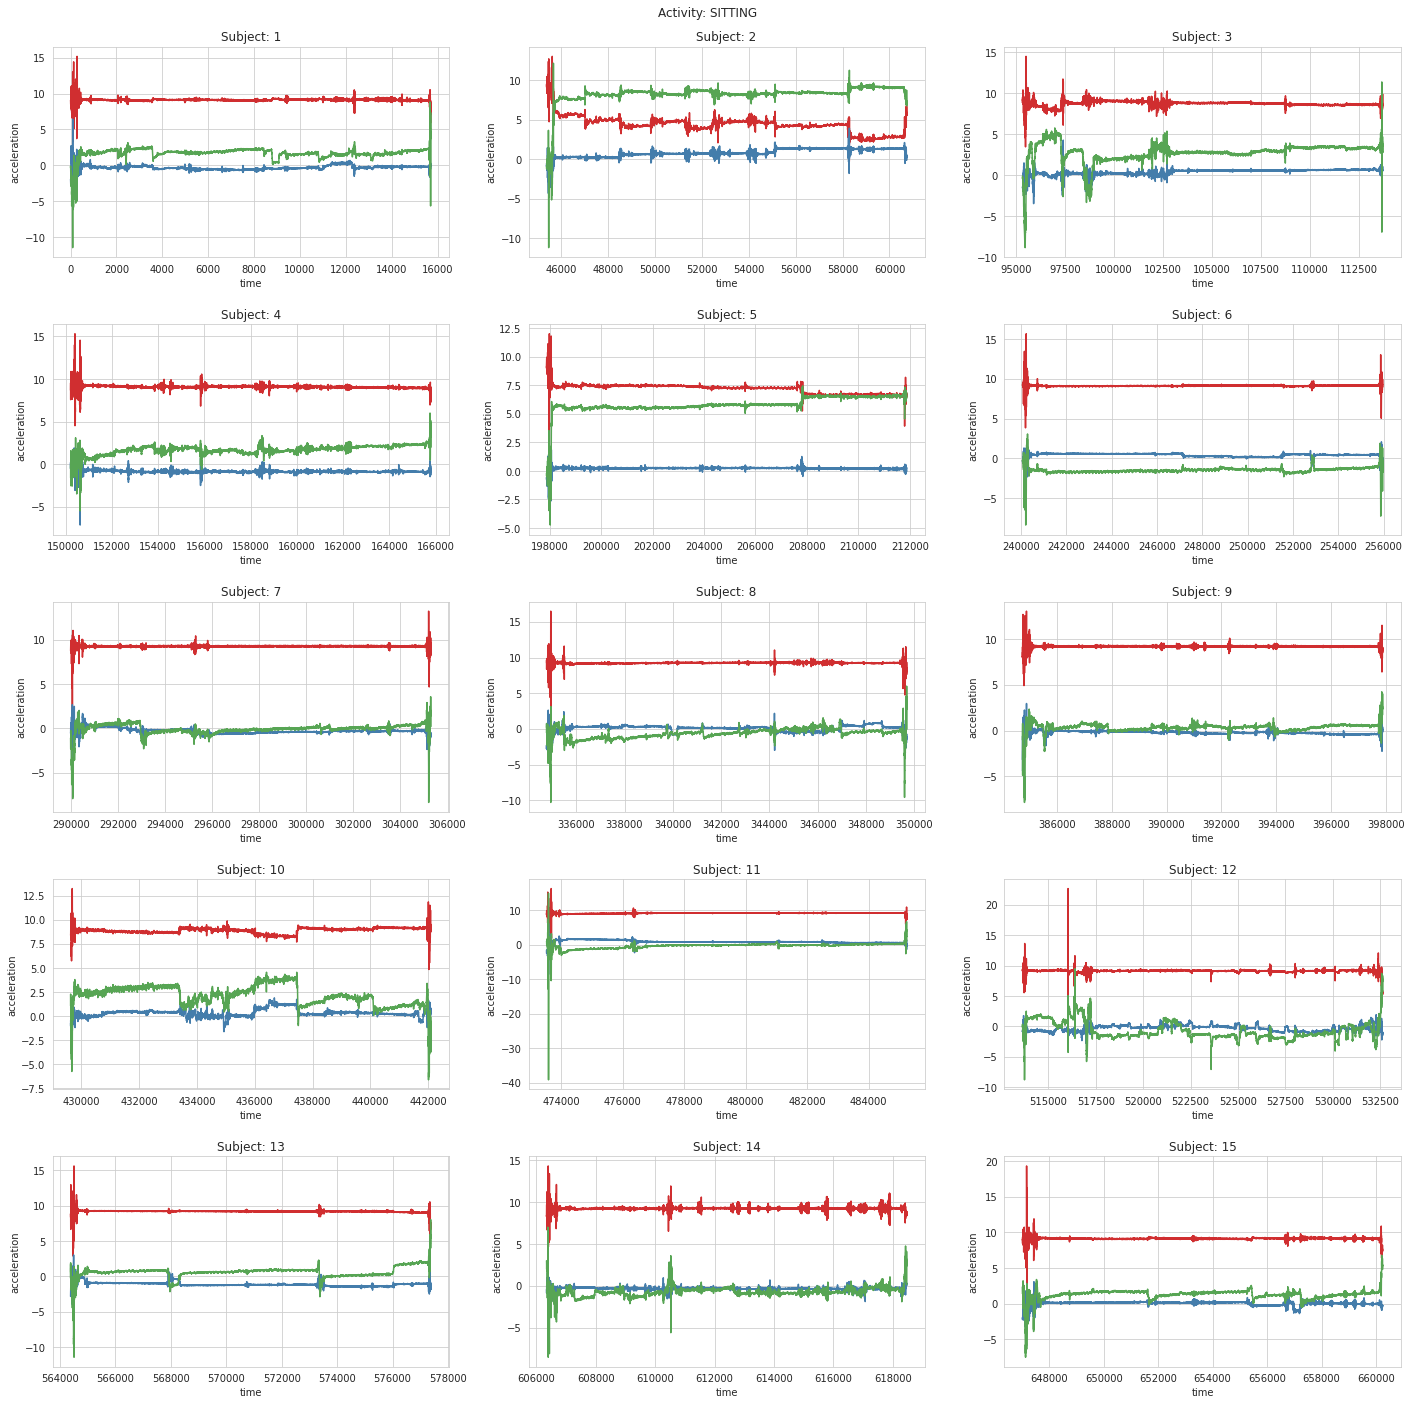

In [ ]:
t = 1

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for i in range(15):
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccX'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccY'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccZ'])
    axes[int(i/3)][i % 3].set_title('Subject: ' + str(i+1))
    #axes[int(i/4)][i % 4].set_xlim(0,500)
    #axes[int(i/4)][i % 4].set_ylim(-3,3)
    axes[int(i/3)][i % 3].set_xlabel('time')
    axes[int(i/3)][i % 3].set_ylabel('acceleration')

fig.suptitle('Activity: SITTING')
fig.tight_layout(pad=2.0)
plt.show()

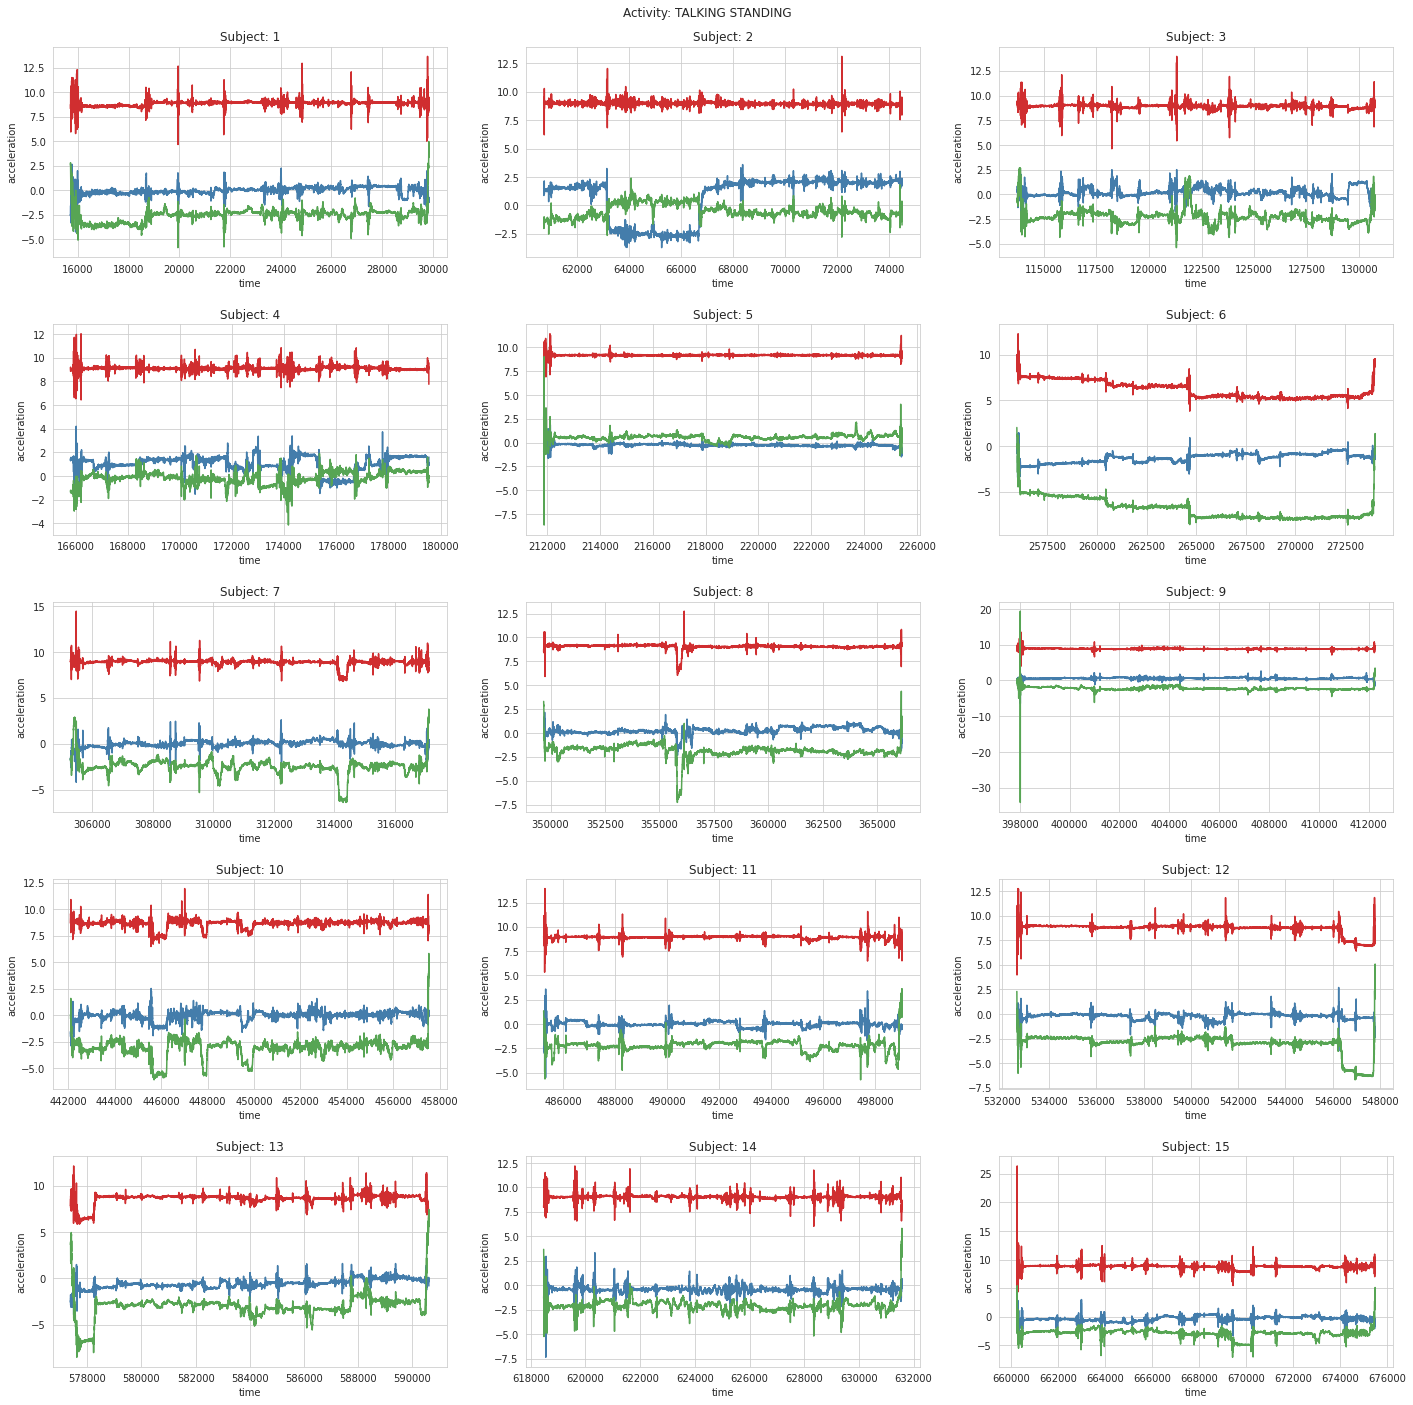

In [ ]:
t = 2

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for i in range(15):
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccX'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccY'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccZ'])
    axes[int(i/3)][i % 3].set_title('Subject: ' + str(i+1))
    #axes[int(i/4)][i % 4].set_xlim(0,500)
    #axes[int(i/4)][i % 4].set_ylim(-3,3)
    axes[int(i/3)][i % 3].set_xlabel('time')
    axes[int(i/3)][i % 3].set_ylabel('acceleration')

fig.suptitle('Activity: TALKING STANDING')
fig.tight_layout(pad=2.0)
plt.show()


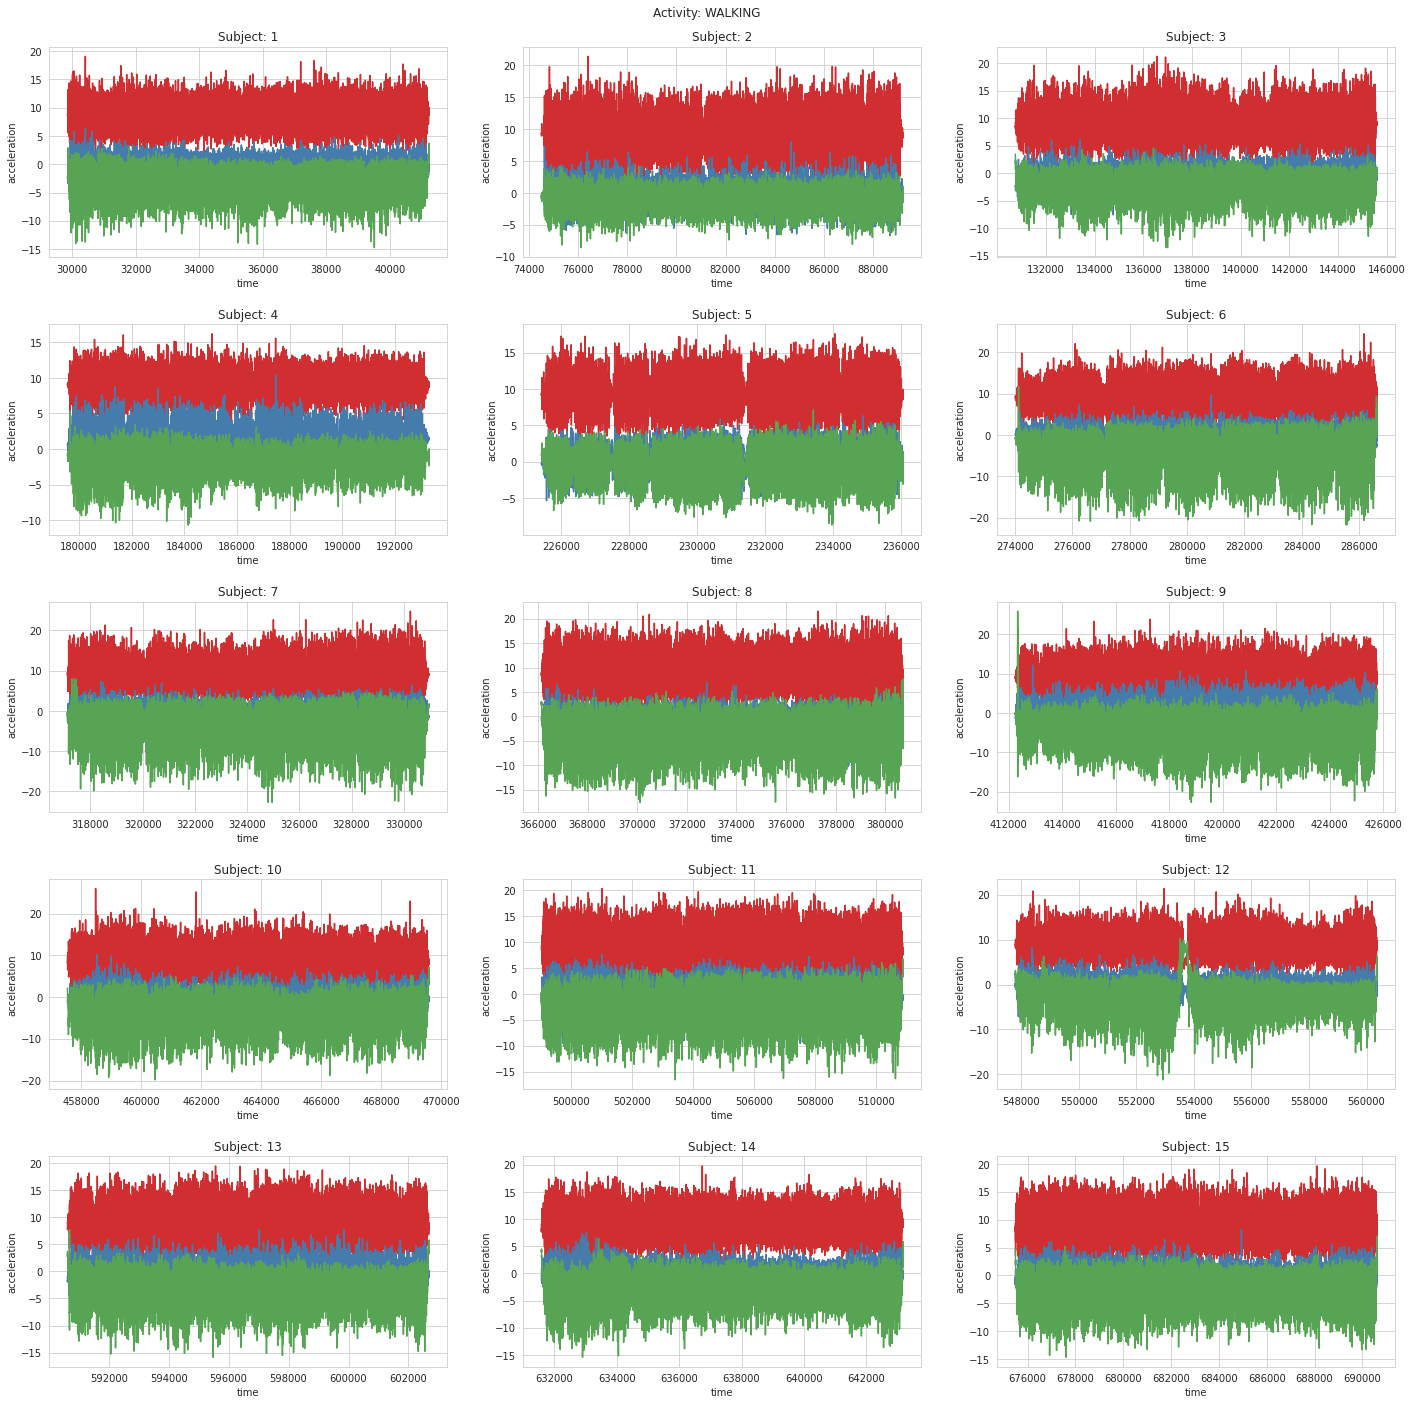

In [ ]:
t = 3

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for i in range(15):
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccX'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccY'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccZ'])
    axes[int(i/3)][i % 3].set_title('Subject: ' + str(i+1))
    #axes[int(i/4)][i % 4].set_xlim(0,500)
    #axes[int(i/4)][i % 4].set_ylim(-3,3)
    axes[int(i/3)][i % 3].set_xlabel('time')
    axes[int(i/3)][i % 3].set_ylabel('acceleration')

fig.suptitle('Activity: WALKING')
fig.tight_layout(pad=2.0)
plt.show()

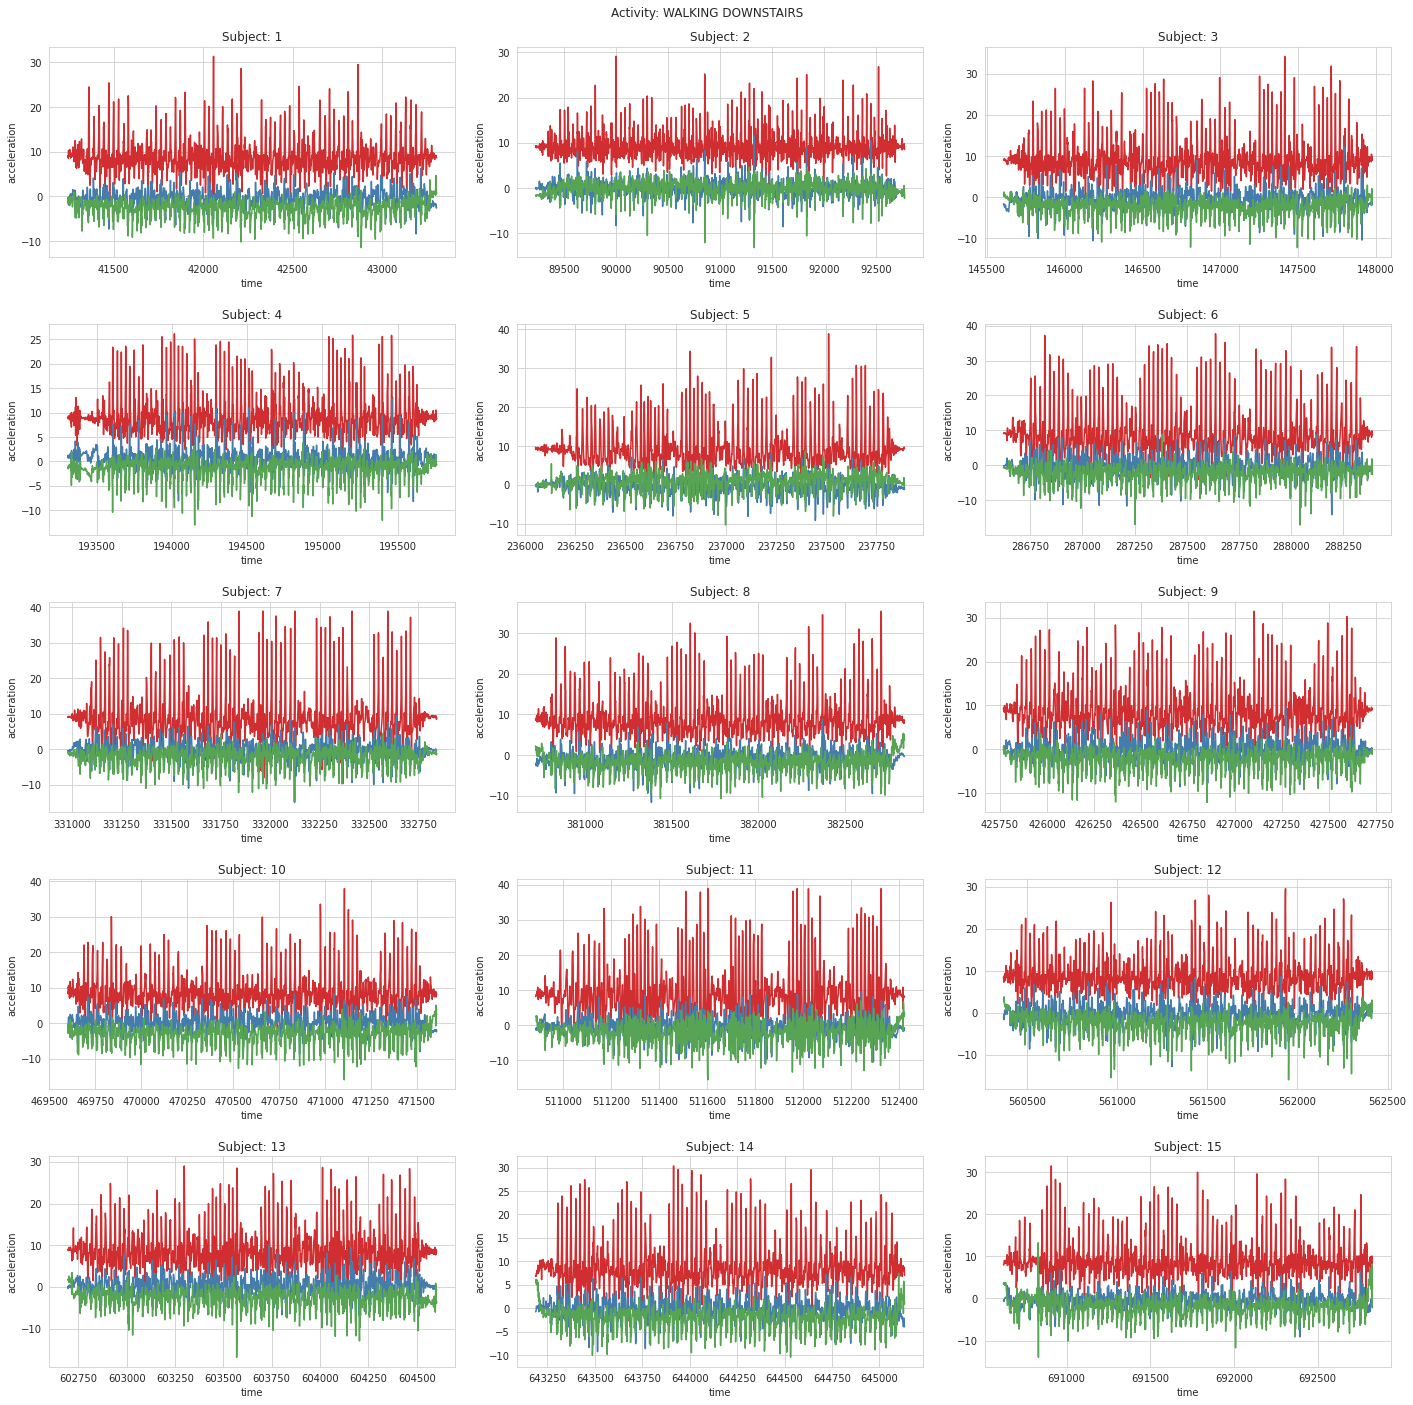

In [ ]:
t = 4

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for i in range(15):
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccX'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccY'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccZ'])
    axes[int(i/3)][i % 3].set_title('Subject: ' + str(i+1))
    #axes[int(i/4)][i % 4].set_xlim(0,500)
    #axes[int(i/4)][i % 4].set_ylim(-3,3)
    axes[int(i/3)][i % 3].set_xlabel('time')
    axes[int(i/3)][i % 3].set_ylabel('acceleration')

fig.suptitle('Activity: WALKING DOWNSTAIRS')
fig.tight_layout(pad=2.0)
plt.show()

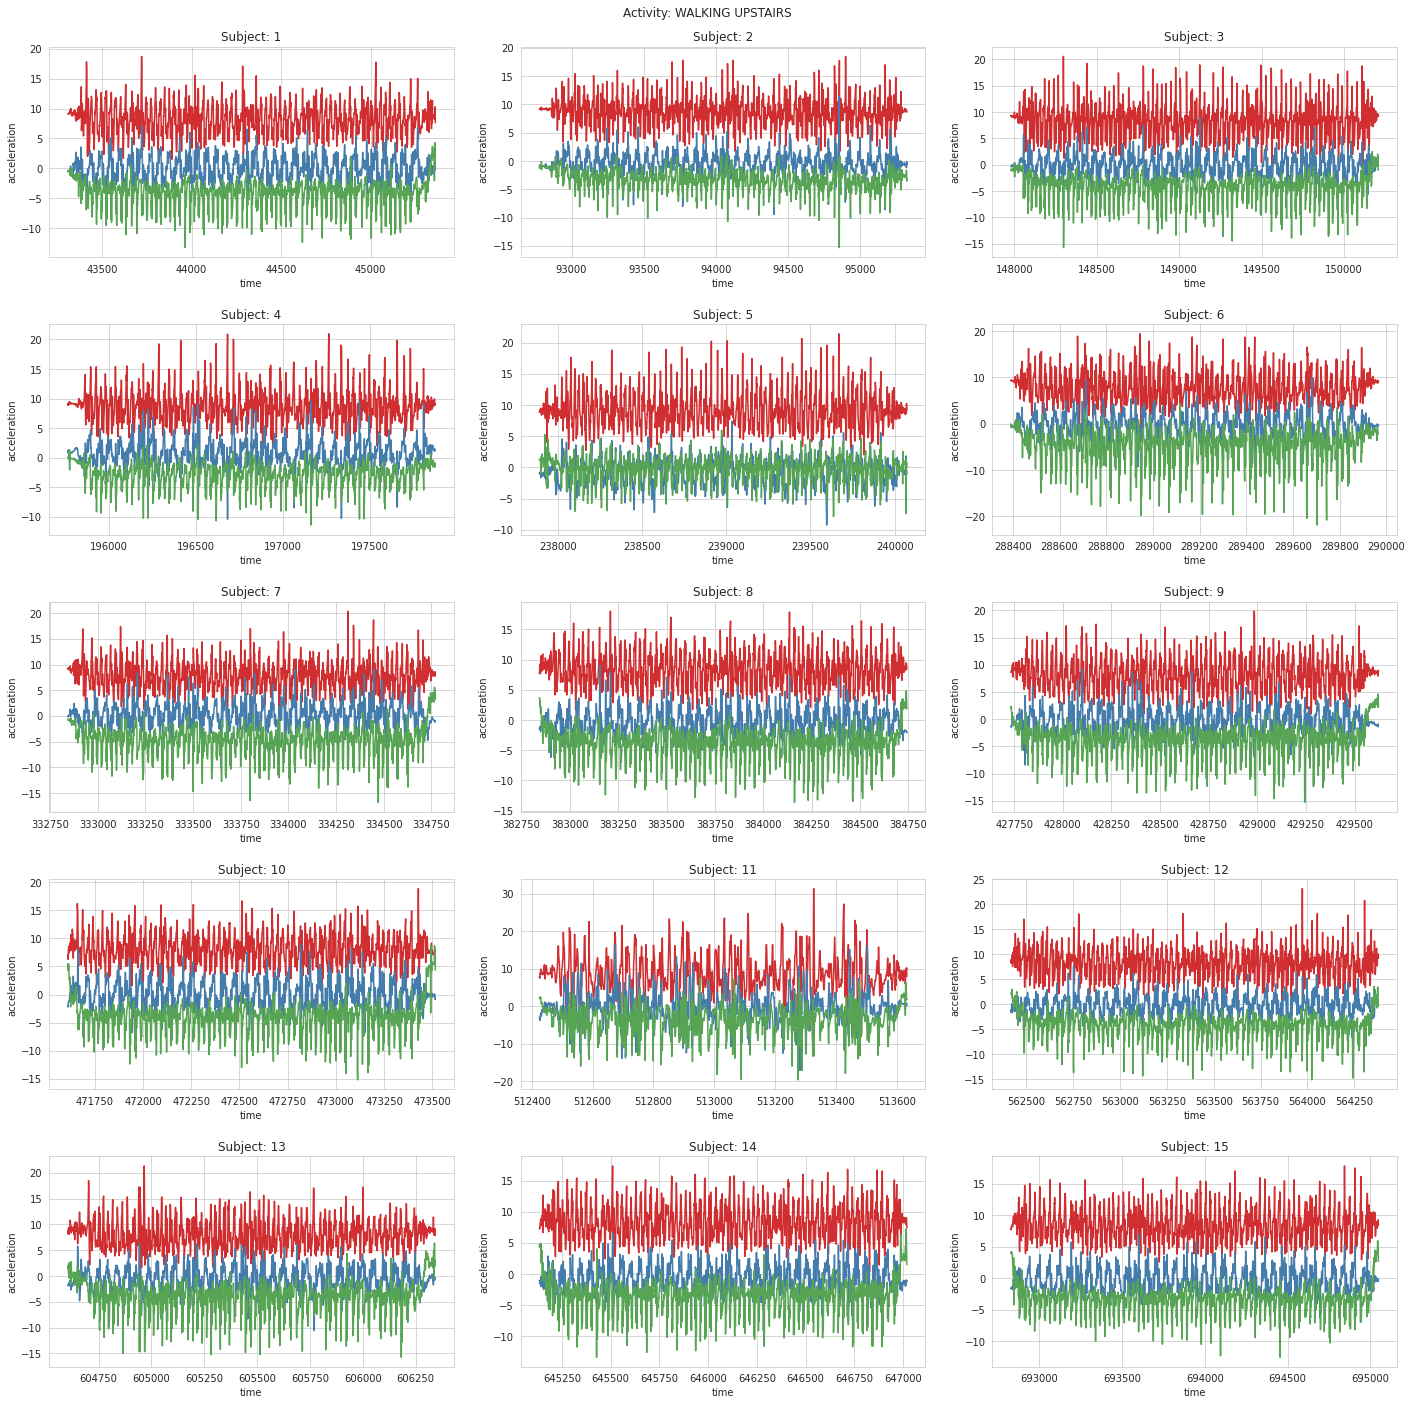

In [ ]:
t = 5

fig, axes = plt.subplots(5, 3, figsize=(20,20))

for i in range(15):
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccX'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccY'])
    axes[int(i/3)][i % 3].plot(df[(df.subject == i+1) & (df.label == t)]['AccZ'])
    axes[int(i/3)][i % 3].set_title('Subject: ' + str(i+1))
    #axes[int(i/4)][i % 4].set_xlim(0,500)
    #axes[int(i/4)][i % 4].set_ylim(-3,3)
    axes[int(i/3)][i % 3].set_xlabel('time')
    axes[int(i/3)][i % 3].set_ylabel('acceleration')

fig.suptitle('Activity: WALKING UPSTAIRS')
fig.tight_layout(pad=2.0)
plt.show()

Построим корреляционные матрицы для каждого измерения акселерометра из 3х. Видно что по оси X наиболее коррелированы между собой sitting и talking standing, две статические активности.

In [ ]:
df2 = df[['AccX','AccY','AccZ','label', 't']]
corr_t = pd.pivot_table(df2, index = 't',columns = 'label', values = 'AccX')
corr_t.dropna(axis = 0, inplace=True)
matrix = corr_t.corr()
matrix

<ipython-input-8-f957d1af15c1>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  corr_t = pd.pivot_table(df2, index = 't',columns = 'label', values = 'AccX')


label
label


По оси Y также видно что наиболее скоррелированы активности sitting и talking standing а также активность walking довольно сильно коррелирована с двумя статическими активностями.

In [ ]:
corr_t = pd.pivot_table(df2, index = 't',columns = 'label', values = 'AccY')
corr_t.dropna(axis = 0, inplace=True)
matrix = corr_t.corr()
matrix

label,1,2,3,4,5
label,,,,,
1,1.000000,0.683587,0.163810,-0.018881,0.030003
2,0.683587,1.000000,0.174241,-0.029538,-0.006099
3,0.163810,0.174241,1.000000,-0.057764,0.026643
4,-0.018881,-0.029538,-0.057764,1.000000,-0.041497
5,0.030003,-0.006099,0.026643,-0.041497,1.000000


По оси Z видно что вообще все ативности довольно сильно скоррелированы между собой, кроме активностей sitting и walking downstairs

In [ ]:
corr_t = pd.pivot_table(df2, index = 't',columns = 'label', values = 'AccZ')
corr_t.dropna(axis = 0, inplace=True)
matrix = corr_t.corr()
matrix

<ipython-input-10-724e01a404ba>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  corr_t = pd.pivot_table(df2, index = 't',columns = 'label', values = 'AccZ')


label
label


In [ ]:
df['V'] = (df['AccX']**2+df['AccY']**2+df['AccZ']**2)**0.5

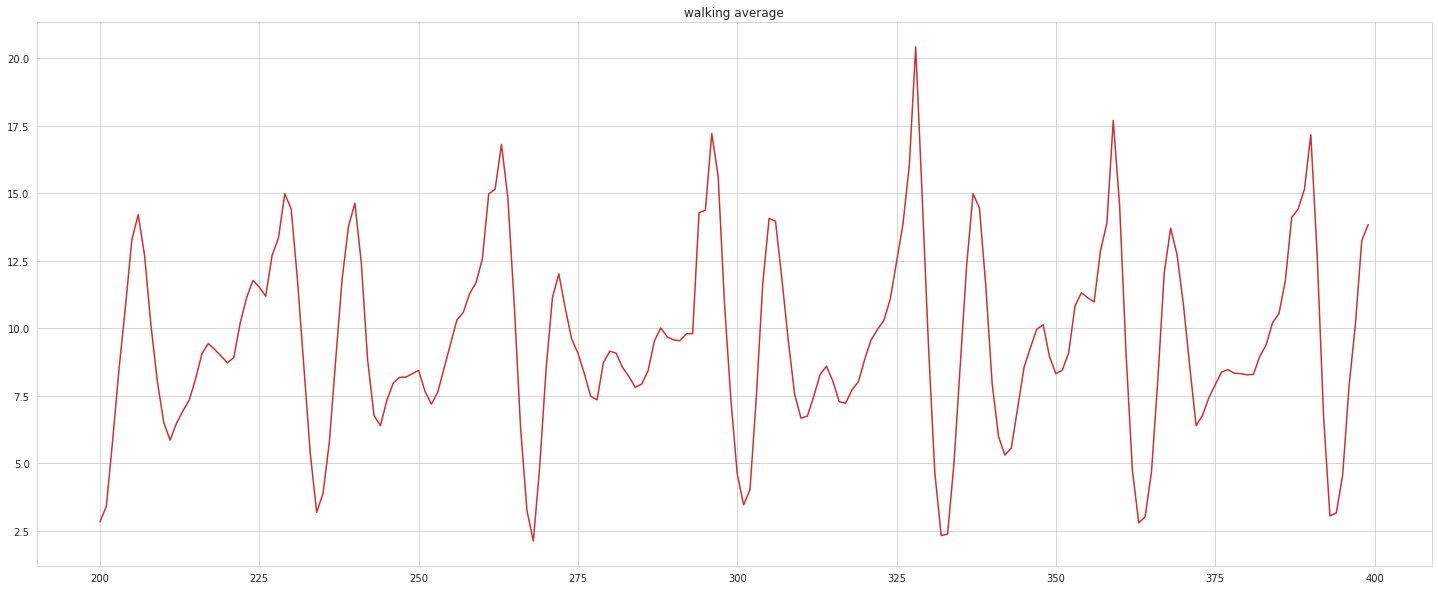

In [ ]:
plt.figure(figsize=(25,10))
plt.title('walking average')
plt.plot( df[(df.label == 3)][200:400].t, df[(df.subject == 2) & (df.label == 3)][200:400].V)
plt.show()

In [ ]:
средняя скорость 90-120 шагов в минуту -> 1.5-2 шага в 1 секунду -> 0.75 - 0.5 выполнения 1 шага. 

Если предположить, что в нашем датасете частота измерений = 50 раз в секунду, то измерение делается 1 раз в 0.02 секунды. 
Между двумя минимальными точками находится 25-35 измерений, если предположить, 
что это 1 шаг, то время такого шага будет равно 25 * 0.02 сек = 0.5 - 0.7 сек, или 1.5-2 шага в секунду.


,t,AccX,AccY,AccZ,label,subject,ActivityName,V
0,0,9.074509,-1.946289,-0.368027,1,1,SITTING,9.288175
1,1,8.911713,-2.267120,-0.116638,1,1,SITTING,9.196307
2,2,8.972763,-2.453857,-0.219589,1,1,SITTING,9.304843
3,3,8.930862,-2.386826,-0.296204,1,1,SITTING,9.249052
4,4,8.769257,-2.394013,-0.306976,1,1,SITTING,9.095350
...,...,...,...,...,...,...,...,...
695045,48025,8.405334,-0.411606,5.959854,5,15,WALKING UPSTAIRS,10.312076
695046,48026,8.645950,-0.264374,5.008148,5,15,WALKING UPSTAIRS,9.995193
695047,48027,9.268448,-0.373306,4.522125,5,15,WALKING UPSTAIRS,10.319550
695048,48028,8.791992,-0.518158,3.176590,5,15,WALKING UPSTAIRS,9.362603
